# 1. Fitting Ne lines in a loop
- This notebook shows how to fit all lines in a folder defined by path
- You tweak the fit for a single line, and then use this to fit all lines. You can then refit lines with high residuals/offsets differing from the rest

## Downloading locally
- You can install DiadFit through PyPI, simply uncomment this line. You only need to run this once per computer (until you want to get an upgraded version)

In [1]:
#!pip install DiadFit --upgrade 

## Now import the packages you need
- When you communicate bugs with Penny, make sure you specify the version here.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.57'

##  Specifying paths
- Put your path here, e.g. where in your computer the spectra and metadata are saved

In [3]:
import os
DayFolder=os.getcwd()
meta_path=DayFolder +  '\MetaData'
spectra_path=DayFolder + '\Spectra'
filetype='headless_txt'

In [4]:
Ne_files=pf.get_files(path=spectra_path,
file_ext='txt', ID_str='N', 
exclude_str=['diad', 'mol'], sort=False)

Ne_files

['Ne_lines_12_2.txt',
 'Ne_lines_1_1.txt',
 'Ne_lines_1_2.txt',
 'Ne_lines_2_1.txt',
 'Ne_lines_2_2.txt',
 'Ne_lines_3_1.txt',
 'Ne_lines_3_2.txt',
 'Ne_lines_4_1.txt',
 'Ne_lines_4_2.txt',
 'Ne_lines_5_1.txt',
 'Ne_lines_5_2.txt',
 'Ne_lines_6_1.txt',
 'Ne_lines_6_2.txt',
 'Ne_lines_7_1.txt',
 'Ne_lines_7_2.txt',
 'Ne_lines_8_1.txt',
 'Ne_lines_8_2.txt',
 'Ne_lines_9_1.txt',
 'Ne_lines_9_2.txt',
 'Ne_lines_10_1.txt',
 'Ne_lines_10_2.txt',
 'Ne_lines_11_1.txt',
 'Ne_lines_11_2.txt',
 'Ne_lines_12_1.txt']

### Get Ne line positions for your specific laser wavelength
- At the moment, this returns any Ne lines with intensity >2000 in the NIST databook, although you can change this!

In [5]:
wavelength =532.02 # Specify the specific wavelength of your laser 
df_Ne=pf.calculate_Ne_line_positions(wavelength=wavelength, 
cut_off_intensity=2000)
df_Ne.head()

,Raman_shift (cm-1),Intensity,Ne emission line in air
1,819.618059,5000.0,556.27662
9,1118.005523,5000.0,565.66588
16,1311.398741,5000.0,571.92248
19,1399.833669,5000.0,574.82985
23,1448.483158,7000.0,576.44188


### Calculate the ideal distance between the two lines you are selecting
- This finds the closest line in the table above for each selected line

In [6]:
line_1=1117
line_2=1447
ideal_split=pf.calculate_Ne_splitting(wavelength=wavelength, 
line1_shift=line_1, line2_shift=line_2,
cut_off_intensity=2000)
ideal_split

,Ne_Split,Line_1,Line_2,Entered Pos Line 1,Entered Pos Line 2
0,330.477634,1118.005523,1448.483158,1117,1447


## Select one file to tweak the fit for
- You can either do this numerically, or by specifiying the filename between ''

In [7]:
i=0 # Select one file
filename=Ne_files[3] 
print(filename)

Ne_lines_2_1.txt


## Plot Ne lines to inspect
- This function allows you to inspect your spectra, and also uses scipy find peaks to get a first guess of the peak positions, which speeds up the voigt fitting in the later part of the notebook
- This also prints the heights of the other peaks so you could choose other Neons if you wanted to

,Peak1_cent,Peak1_height,Peak2_cent,Peak2_height,Peak1_prom,Peak2_prom
71,1117.29,11743.0,1448.29,64525.0,11333.0,64115.0


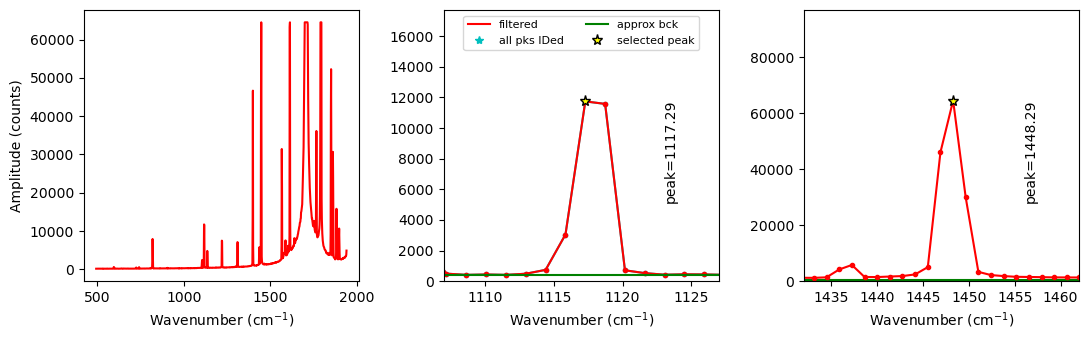

In [8]:
exclude_range_1=None
exclude_range_2=None


Neon_id_config=pf.Neon_id_config(height=10,  distance=1, prominence=10, 
            width=1, threshold=0.6,
            peak1_cent=line_1, peak2_cent=line_2, n_peaks=6, 
            exclude_range_1=exclude_range_1, 
            exclude_range_2=exclude_range_2)
Neon_id_config

Ne, df_fit_params=pf.identify_Ne_lines(path=spectra_path,
filename=filename, filetype=filetype,
config=Neon_id_config, print_df=False)
df_fit_params

### Tweak peak parameters
- One important thing is the background positions, these are defined relative to the peak position. Once you tweak them for each instrument, you chould be good to go. 
- Another thing is how many peaks you want for Peak1, 'peaks_1', for the 1117 line, you'll need 2 if you have the clear secondary peak seen above. 

In [9]:
pf.Ne_peak_config()

Ne_peak_config(model_name='PseudoVoigtModel', N_poly_pk1_baseline=1, N_poly_pk2_baseline=1, lower_bck_pk1=(-50, -25), upper_bck1_pk1=(8, 15), upper_bck2_pk1=(30, 50), lower_bck_pk2=(-44.2, -22), upper_bck1_pk2=(15, 50), upper_bck2_pk2=(50, 51), peaks_1=2, DeltaNe_ideal=330.477634, x_range_baseline_pk1=20, y_range_baseline_pk1=200, x_range_baseline_pk2=20, y_range_baseline_pk2=200, pk1_sigma=0.4, pk2_sigma=0.4, x_range_peak=15, x_range_residual=7, LH_offset_mini=(1.5, 3), x_span_pk1=None, x_span_pk2=None)

In [10]:
model_name='PseudoVoigtModel'
Ne_Config_est=pf.Ne_peak_config(model_name=model_name,
 DeltaNe_ideal=ideal_split['Ne_Split'], peaks_1=1, LH_offset_mini=[2, 5],
pk1_sigma=1.5, pk2_sigma=1.5, y_range_baseline_pk1=500, y_range_baseline_pk2=5000,
lower_bck_pk1=(-80, -25), upper_bck1_pk1=[40, 70], upper_bck2_pk1=[40, 70],
lower_bck_pk2=[-40, -20], upper_bck1_pk2=[10, 15], upper_bck2_pk2=[25, 40],
x_range_peak=15, x_span_pk1=[-5, 5], x_span_pk2=[-5, 5],
N_poly_pk2_baseline=2)



# model_name=model_name,
#  DeltaNe_ideal=ideal_split['Ne_Split'], peaks_1=1, LH_offset_mini=[2, 5],
# pk1_sigma=1.5, pk2_sigma=1.5, y_range_baseline_pk1=500, y_range_baseline_pk2=5000,
# lower_bck_pk1=(-80, -25), upper_bck1_pk1=[40, 70], upper_bck2_pk1=[40, 70],
# lower_bck_pk2=[-40, -20], upper_bck1_pk2=[10, 15], upper_bck2_pk2=[25, 40],
# x_range_peak=15, x_span_pk1=[-5, 5], x_span_pk2=[-5, 5],
# N_poly_pk2_baseline=2


,filename,pk2_peak_cent,pk2_amplitude,pk2_sigma,pk2_gamma,error_pk2,Peak2_Prop_Lor,pk1_peak_cent,pk1_amplitude,pk1_sigma,pk1_gamma,error_pk1,Peak1_Prop_Lor,deltaNe,Ne_Corr,Ne_Corr_min,Ne_Corr_max,residual_pk2,residual_pk1,residual_pk1+pk2
0,Ne_lines_2_1.txt,1448.044886,200968.986897,1.427474,None,1,8.067408e-11,1117.964536,39895.584749,1.128408,None,0.0435,0.276336,330.08035,1.001204,0.998048,1.004379,1674.823299,426.239236,2101.062535


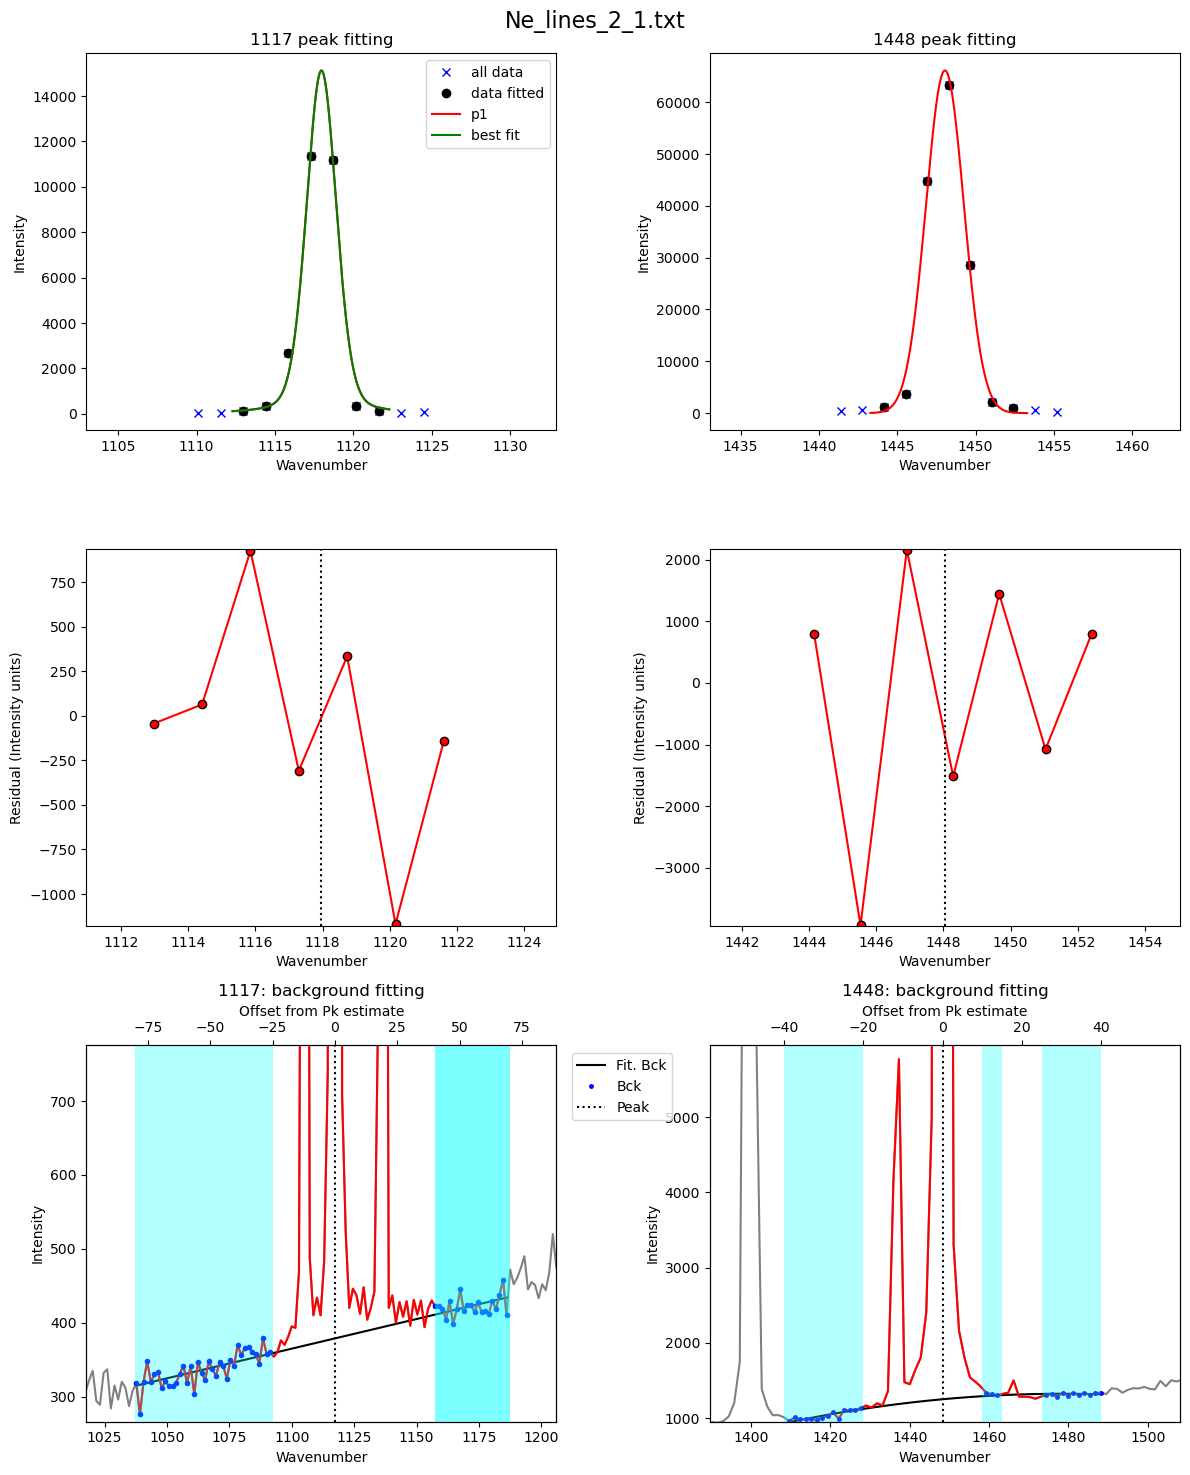

In [11]:

df_test_params=pf.fit_Ne_lines(Ne=Ne, filename=filename,
path=spectra_path, prefix=False,
config=Ne_Config_est,
    Ne_center_1=df_fit_params['Peak1_cent'].iloc[i], 
    Ne_center_2=df_fit_params['Peak2_cent'].iloc[i],
    Ne_prom_1=df_fit_params['Peak1_prom'].iloc[i],
    Ne_prom_2=df_fit_params['Peak2_prom'].iloc[i],
    const_params=False)                                                                 
                                                                     
display(df_test_params)

In [12]:
## Update sigma based on this one fit
Ne_Config_tweak=Ne_Config_est
Ne_Config_tweak.pk1_sigma=df_test_params['pk1_sigma'].iloc[0]
Ne_Config_tweak.pk2_sigma=df_test_params['pk2_sigma'].iloc[0]

## Now fit all Ne files here using these parameters. 
- If you select plot_figure=False, the loop will be quick. 
- But if its True, you can to inspect the figures.

In [13]:
df2=pf.loop_Ne_lines(files=Ne_files, spectra_path=spectra_path, 
filetype=filetype, config_ID_peaks=Neon_id_config, config=Ne_Config_tweak,
df_fit_params=df_fit_params,                    
plot_figure=False)

  0%|          | 0/24 [00:00<?, ?it/s]

In [14]:
df2

,filename,Ne_Corr,deltaNe,pk2_peak_cent,pk1_peak_cent,pk2_amplitude,pk1_amplitude,residual_pk2,residual_pk1,pk2_sigma,pk2_gamma,error_pk2,Peak2_Prop_Lor,pk1_sigma,pk1_gamma,error_pk1,Peak1_Prop_Lor,Ne_Corr_min,Ne_Corr_max,residual_pk1+pk2
0,Ne_lines_12_2.txt,1.000098,330.445126,1448.553879,1118.108753,201929.402817,50278.442981,2318.611370,588.780571,1.401790,None,1,1.039266e-10,0.902726,None,0.0703,0.426267,0.996870,1.003348,2907.391941
1,Ne_lines_1_1.txt,1.001157,330.095759,1447.744338,1117.648580,215902.700929,46564.904643,2838.931106,207.401614,1.353410,None,1,1.485888e-09,1.162331,None,0.0539,0.176134,0.997971,1.004364,3046.332720
2,Ne_lines_1_2.txt,1.000362,330.358106,1448.517749,1118.159643,213799.960960,48424.242869,3050.191977,553.773153,1.480903,None,1,1.915784e-11,0.902726,None,0.0772,0.411162,0.997111,1.003634,3603.965129
3,Ne_lines_2_1.txt,1.001204,330.080371,1448.044888,1117.964517,200969.205816,39896.701501,1674.819919,426.304403,1.427476,None,1,4.792210e-09,1.128324,None,0.0435,0.276485,0.998048,1.004379,2101.124322
4,Ne_lines_2_2.txt,1.000463,330.324610,1448.386875,1118.062266,215030.726055,60122.569287,3010.880691,702.638279,1.519435,None,1,8.906686e-10,0.902726,None,0.0519,0.466566,0.997287,1.003659,3713.518970
5,Ne_lines_3_1.txt,1.001019,330.141315,1448.136828,1117.995513,186271.037043,24002.352355,1314.688715,258.364763,1.141979,None,1,4.531544e-01,1.075489,None,0.0385,0.414644,0.997880,1.004177,1573.053478
6,Ne_lines_3_2.txt,1.000416,330.340158,1448.321953,1117.981795,220569.357495,55930.852182,3180.623085,610.084376,1.552060,None,1,2.210014e-10,1.093967,None,0.0412,0.256815,0.997273,1.003579,3790.707461
7,Ne_lines_4_1.txt,1.000438,330.332870,1448.280387,1117.947517,194207.068533,38833.850943,1145.338091,421.760822,1.416069,None,1,3.330669e-15,1.163611,None,0.0438,0.247966,0.997287,1.003609,1567.098913
8,Ne_lines_4_2.txt,1.000246,330.396198,1448.539554,1118.143357,186360.911007,38526.153201,828.934038,468.014541,1.252846,None,1,1.398524e-01,0.902726,None,0.0758,0.450406,0.997000,1.003514,1296.948580
9,Ne_lines_5_1.txt,1.000147,330.428960,1448.664948,1118.235987,186387.003452,33046.557182,1105.609599,423.789152,1.141979,None,1,2.518075e-01,0.902726,None,0.0815,0.361150,0.996884,1.003432,1529.398751


## Now extract metadata to get a timestamp for each file

In [15]:
## Get meta files
meta_path=spectra_path
Ne_files_meta=pf.get_files(path=meta_path,
file_ext='txt', ID_str='N', 
exclude_str=['diad', 'mol'], sort=False)

Ne_files_meta[0:5]

['Ne_lines_12_2.txt',
 'Ne_lines_1_1.txt',
 'Ne_lines_1_2.txt',
 'Ne_lines_2_1.txt',
 'Ne_lines_2_2.txt']

## File structures with no metadata
- Many files have no metadata - Here, all we really need is the timestamp. We do this using this function which uses the modificatoin time of the file (in this instance, this is the end of the acquisition)

In [16]:
meta=pf.loop_convert_datastamp_to_metadata(path=spectra_path, 
files=Ne_files, creation=False,
modification=True)
meta

,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,Ne_lines_1_1.txt,"January 1, 2020",January,1,NaN,NaN,NaN,NaN,NaN,1:58:25,7105,NaN
0,Ne_lines_1_2.txt,"January 1, 2020",January,1,NaN,NaN,NaN,NaN,NaN,2:0:27,7227,NaN
0,Ne_lines_2_1.txt,"January 1, 2020",January,1,NaN,NaN,NaN,NaN,NaN,2:15:55,8155,NaN
0,Ne_lines_2_2.txt,"January 1, 2020",January,1,NaN,NaN,NaN,NaN,NaN,2:20:34,8434,NaN
0,Ne_lines_3_1.txt,"January 1, 2020",January,1,NaN,NaN,NaN,NaN,NaN,2:56:49,10609,NaN
0,Ne_lines_3_2.txt,"January 1, 2020",January,1,NaN,NaN,NaN,NaN,NaN,3:0:8,10808,NaN
0,Ne_lines_4_1.txt,"January 1, 2020",January,1,NaN,NaN,NaN,NaN,NaN,3:32:38,12758,NaN
0,Ne_lines_4_2.txt,"January 1, 2020",January,1,NaN,NaN,NaN,NaN,NaN,3:39:53,13193,NaN
0,Ne_lines_6_1.txt,"January 1, 2020",January,1,NaN,NaN,NaN,NaN,NaN,4:31:37,16297,NaN
0,Ne_lines_6_2.txt,"January 1, 2020",January,1,NaN,NaN,NaN,NaN,NaN,4:33:10,16390,NaN


In [17]:
# Strip away suffix and prefix if needed
print(meta['filename'][0])

0     Ne_lines_1_1.txt
0     Ne_lines_1_2.txt
0     Ne_lines_2_1.txt
0     Ne_lines_2_2.txt
0     Ne_lines_3_1.txt
0     Ne_lines_3_2.txt
0     Ne_lines_4_1.txt
0     Ne_lines_4_2.txt
0     Ne_lines_6_1.txt
0     Ne_lines_6_2.txt
0     Ne_lines_5_1.txt
0     Ne_lines_5_2.txt
0     Ne_lines_7_1.txt
0     Ne_lines_7_2.txt
0     Ne_lines_8_1.txt
0     Ne_lines_8_2.txt
0     Ne_lines_9_1.txt
0     Ne_lines_9_2.txt
0    Ne_lines_10_1.txt
0    Ne_lines_10_2.txt
0    Ne_lines_11_1.txt
0    Ne_lines_11_2.txt
0    Ne_lines_12_1.txt
0    Ne_lines_12_2.txt
Name: filename, dtype: object


In [18]:
# remove these to get the pure file name you can compare 
file_m=pf.extracting_filenames_generic(names=meta['filename'],
    prefix=False, str_prefix=None,
   file_type='.txt')
file_m

g:\my drive\berkeley_new\diadfit_outer\src\DiadFit\importing_data_files.py:1065: FutureWarning: The default value of regex will change from True to False in a future version.
  names=names.str.replace(file_type, '')


['Ne_lines_1_1',
 'Ne_lines_1_2',
 'Ne_lines_2_1',
 'Ne_lines_2_2',
 'Ne_lines_3_1',
 'Ne_lines_3_2',
 'Ne_lines_4_1',
 'Ne_lines_4_2',
 'Ne_lines_6_1',
 'Ne_lines_6_2',
 'Ne_lines_5_1',
 'Ne_lines_5_2',
 'Ne_lines_7_1',
 'Ne_lines_7_2',
 'Ne_lines_8_1',
 'Ne_lines_8_2',
 'Ne_lines_9_1',
 'Ne_lines_9_2',
 'Ne_lines_10_1',
 'Ne_lines_10_2',
 'Ne_lines_11_1',
 'Ne_lines_11_2',
 'Ne_lines_12_1',
 'Ne_lines_12_2']

In [19]:
# Do the same for spectra, e.g., work out what you need to strip off
print(df2['filename'][0])

Ne_lines_12_2.txt


In [20]:
file_s=pf.extracting_filenames_generic(names=df2['filename'],
    prefix=False, str_prefix=' ',
   file_type='.txt')
file_s

['Ne_lines_12_2',
 'Ne_lines_1_1',
 'Ne_lines_1_2',
 'Ne_lines_2_1',
 'Ne_lines_2_2',
 'Ne_lines_3_1',
 'Ne_lines_3_2',
 'Ne_lines_4_1',
 'Ne_lines_4_2',
 'Ne_lines_5_1',
 'Ne_lines_5_2',
 'Ne_lines_6_1',
 'Ne_lines_6_2',
 'Ne_lines_7_1',
 'Ne_lines_7_2',
 'Ne_lines_8_1',
 'Ne_lines_8_2',
 'Ne_lines_9_1',
 'Ne_lines_9_2',
 'Ne_lines_10_1',
 'Ne_lines_10_2',
 'Ne_lines_11_1',
 'Ne_lines_11_2',
 'Ne_lines_12_1']

## Combine 2 dataframes
- Here we add a new column to each dataframe with these stripped back names, and then merge the 2 dataframes

In [21]:
meta['name_for_matching']=file_m
df2['name_for_matching']=file_s
df_combo=df2.merge(meta, on='name_for_matching')

## Now lets inspect changes in Ne correction factor with time
- Normally, you can spot outliers this way

In [22]:
df_combo_sort=df_combo.sort_values(by='sec since midnight')
df_combo_sort.to_excel('PseudoVoigt.xlsx')

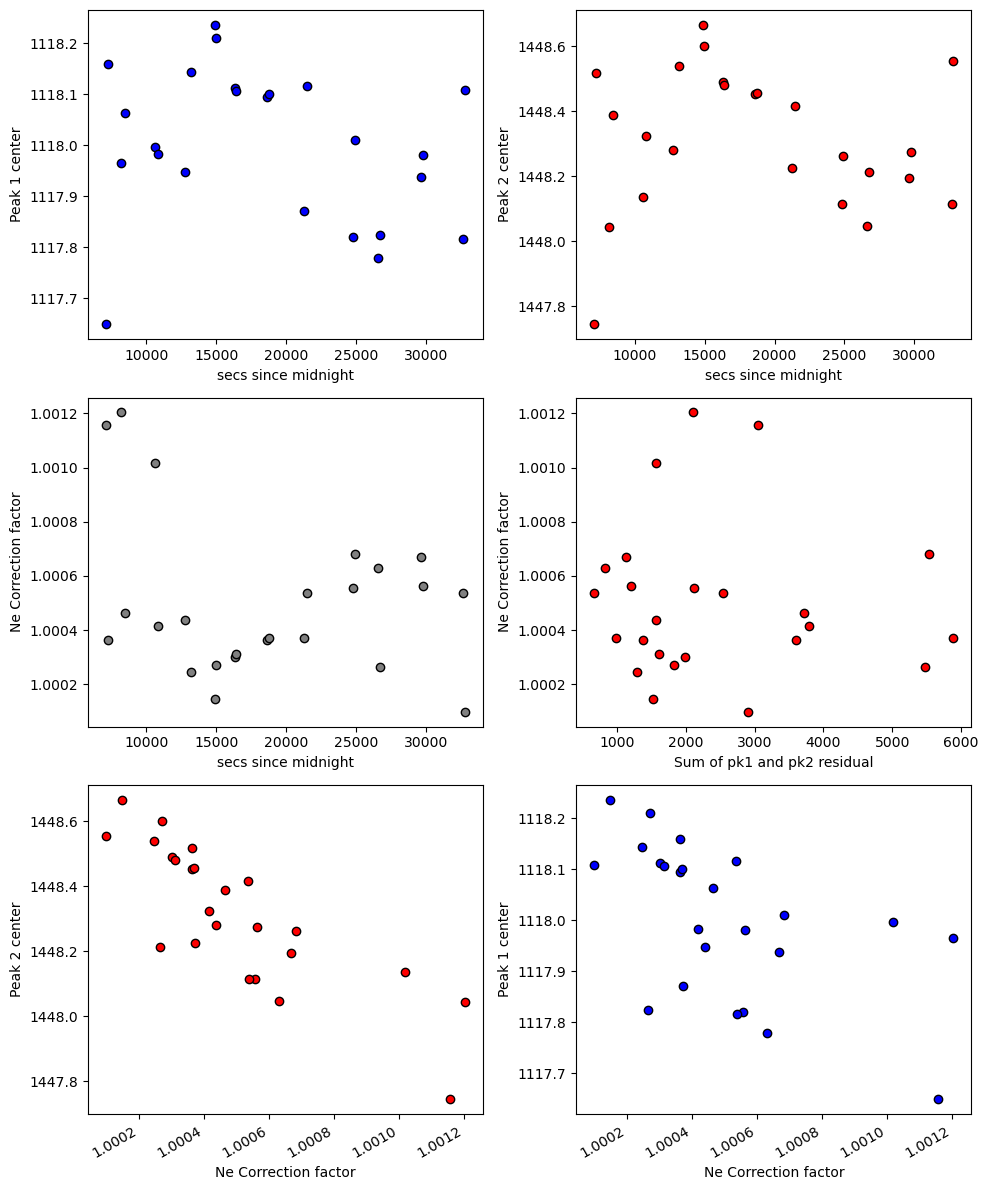

In [23]:
fig=pf.plot_Ne_corrections(df=df_combo, x_axis=df_combo['sec since midnight'],
                      x_label='secs since midnight')


In [24]:
df_combo_sort=df_combo.sort_values(by='sec since midnight')
df_combo

,filename_x,Ne_Corr,deltaNe,pk2_peak_cent,pk1_peak_cent,pk2_amplitude,pk1_amplitude,residual_pk2,residual_pk1,pk2_sigma,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,Ne_lines_12_2.txt,1.000098,330.445126,1448.553879,1118.108753,201929.402817,50278.442981,2318.611370,588.780571,1.401790,...,January,1,NaN,NaN,NaN,NaN,NaN,9:6:35,32795,NaN
1,Ne_lines_1_1.txt,1.001157,330.095759,1447.744338,1117.648580,215902.700929,46564.904643,2838.931106,207.401614,1.353410,...,January,1,NaN,NaN,NaN,NaN,NaN,1:58:25,7105,NaN
2,Ne_lines_1_2.txt,1.000362,330.358106,1448.517749,1118.159643,213799.960960,48424.242869,3050.191977,553.773153,1.480903,...,January,1,NaN,NaN,NaN,NaN,NaN,2:0:27,7227,NaN
3,Ne_lines_2_1.txt,1.001204,330.080371,1448.044888,1117.964517,200969.205816,39896.701501,1674.819919,426.304403,1.427476,...,January,1,NaN,NaN,NaN,NaN,NaN,2:15:55,8155,NaN
4,Ne_lines_2_2.txt,1.000463,330.324610,1448.386875,1118.062266,215030.726055,60122.569287,3010.880691,702.638279,1.519435,...,January,1,NaN,NaN,NaN,NaN,NaN,2:20:34,8434,NaN
5,Ne_lines_3_1.txt,1.001019,330.141315,1448.136828,1117.995513,186271.037043,24002.352355,1314.688715,258.364763,1.141979,...,January,1,NaN,NaN,NaN,NaN,NaN,2:56:49,10609,NaN
6,Ne_lines_3_2.txt,1.000416,330.340158,1448.321953,1117.981795,220569.357495,55930.852182,3180.623085,610.084376,1.552060,...,January,1,NaN,NaN,NaN,NaN,NaN,3:0:8,10808,NaN
7,Ne_lines_4_1.txt,1.000438,330.332870,1448.280387,1117.947517,194207.068533,38833.850943,1145.338091,421.760822,1.416069,...,January,1,NaN,NaN,NaN,NaN,NaN,3:32:38,12758,NaN
8,Ne_lines_4_2.txt,1.000246,330.396198,1448.539554,1118.143357,186360.911007,38526.153201,828.934038,468.014541,1.252846,...,January,1,NaN,NaN,NaN,NaN,NaN,3:39:53,13193,NaN
9,Ne_lines_5_1.txt,1.000147,330.428960,1448.664948,1118.235987,186387.003452,33046.557182,1105.609599,423.789152,1.141979,...,January,1,NaN,NaN,NaN,NaN,NaN,4:8:8,14888,NaN


In [25]:
df_combo_sort.to_clipboard(excel=True)

## Exclude ones that don't look right...
- The filter_Ne_Line_neighbours excludes Ne lines that have a correction factor more than "offset" from their N neighbours (defined by "number_av")
- Tweak offset and number_av until you exclude the ones that dont look right

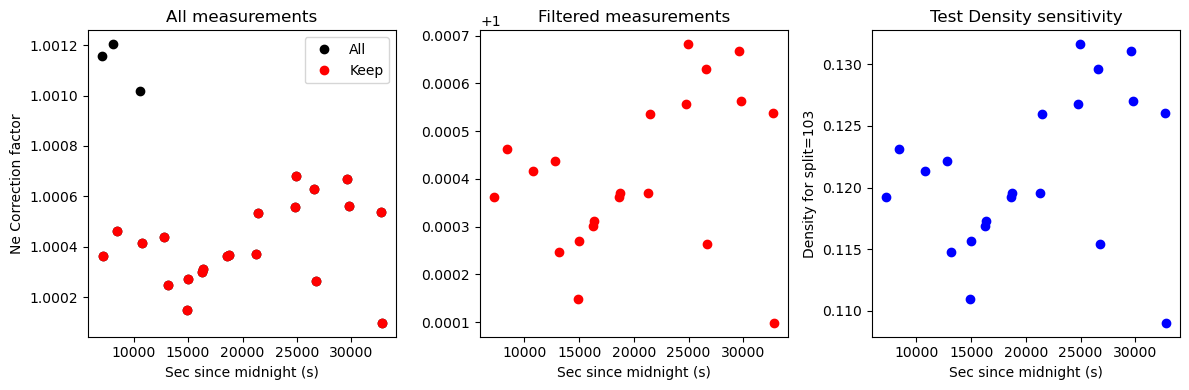

In [26]:
filt=pf.filter_Ne_Line_neighbours(Corr_factor=df_combo['Ne_Corr'], 
                    number_av=10, offset=0.0005)
# Now lets plot this to see
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
ax1.plot(df_combo['sec since midnight'], df_combo['Ne_Corr'],   'ok', label='All')
ax1.plot(df_combo['sec since midnight'], filt,  'or', label='Keep')
ax1.legend()
ax2.plot(df_combo['sec since midnight'], filt,  'or', label='Keep')

test_split=103
split=filt*test_split
density_test=pf.calculate_density_cornell(temp='SupCrit', Split=split)
ax3.plot(df_combo['sec since midnight'].loc[density_test['Preferred D']>0],
         density_test['Preferred D'].loc[density_test['Preferred D']>0], 'ob')


ax1.set_xlabel('Sec since midnight (s)')
ax1.set_ylabel('Ne Correction factor')
ax1.set_title('All measurements')
ax2.set_xlabel('Sec since midnight (s)')
ax2.set_title('Filtered measurements')
ax3.set_xlabel('Sec since midnight (s)')
ax3.set_ylabel('Density for split=' + str(test_split))
ax3.set_title('Test Density sensitivity')
fig.tight_layout()

## Now lets make a regression against time
- We take this time regression and then apply to our diad fits

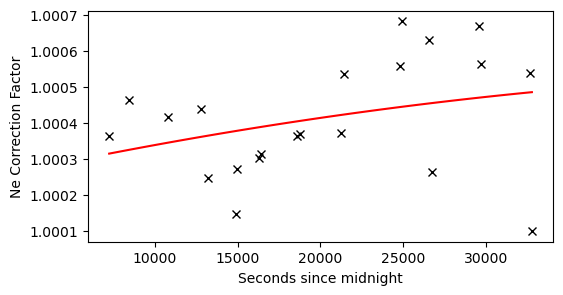

In [27]:
df_combo_filt=df_combo[density_test['Preferred D']>0]
model, fig=pf.reg_Ne_lines_time(df=df_combo_filt, N_poly=2, fit='poly')

# You can also use a spline, but must start and end day with a Neon
# df_combo_filt=df_combo[density_test['Preferred D']>0]
# model, fig=pf.reg_Ne_lines_time(df=df_combo_filt, fit='spline', spline_fit='linear')

## SAving as pickle, can then load as a pickle

In [28]:
import pickle
with open('Ne_Line_Regression_Example_cali.pck', 'wb') as file_handle:
    pickle.dump(model, file_handle)